### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
### 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
### 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
### 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
### 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
### 7. Which lessons are least accessed? 

In [1]:
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
import wrangle as wr

# plotting defaults
plt.rc('figure', figsize=(16, 8))
plt.rc('font', size=16)

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [2]:
#wrangle file pulls in data from swl data base and spits into dataframe of total df and by class df's
df,ds_df, web_df, staff_df = wr.prepare_log()

In [3]:
df

,date,time,endpoint,user_id,ip,cohort_name,start_date,end_date,program_id,page_1,page_2,page_3,page_4
date,,,,,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,,,None,None
2018-01-26,2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,java-ii,None,None,None
2018-01-26,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,java-ii,object-oriented-programming,None,None
2018-01-26,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,slides,object_oriented_programming,None,None
2018-01-26,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,javascript-i,conditionals,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,2021-04-21,16:41:51,jquery/personal-site,64,71.150.217.33,Staff,2014-02-04,2014-02-04,2,jquery,personal-site,None,None
2021-04-21,2021-04-21,16:42:02,jquery/mapbox-api,64,71.150.217.33,Staff,2014-02-04,2014-02-04,2,jquery,mapbox-api,None,None
2021-04-21,2021-04-21,16:42:09,jquery/ajax/weather-map,64,71.150.217.33,Staff,2014-02-04,2014-02-04,2,jquery,ajax,weather-map,None


In [4]:
web_df

,date,time,endpoint,user_id,ip,cohort_name,start_date,end_date,program_id,page_1,page_2,page_3,page_4
date,,,,,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,,,None,None
2018-01-26,2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,java-ii,None,None,None
2018-01-26,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,java-ii,object-oriented-programming,None,None
2018-01-26,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,slides,object_oriented_programming,None,None
2018-01-26,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,javascript-i,conditionals,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,2021-04-21,16:36:09,jquery/personal-site,869,136.50.98.51,Marco,2021-01-25,2021-07-19,2,jquery,personal-site,None,None
2021-04-21,2021-04-21,16:36:34,html-css/css-ii/bootstrap-grid-system,948,104.48.214.211,Neptune,2021-03-15,2021-09-03,2,html-css,css-ii,bootstrap-grid-system,None
2021-04-21,2021-04-21,16:37:48,java-iii,834,67.11.50.23,Luna,2020-12-07,2021-06-08,2,java-iii,None,None,None


In [5]:
staff_df

,date,time,endpoint,user_id,ip,cohort_name,start_date,end_date,program_id,page_1,page_2,page_3,page_4
date,,,,,,,,,,,,,
2018-12-06,2018-12-06,14:15:29,appendix/further-reading/java/intellij-tomcat-...,53,97.105.19.58,Staff,2014-02-04,2014-02-04,2,appendix,further-reading,java,intellij-tomcat-configuration
2018-12-06,2018-12-06,14:25:40,javascript-i,314,97.105.19.58,Staff,2014-02-04,2014-02-04,2,javascript-i,None,None,None
2018-12-06,2018-12-06,14:25:41,javascript-i/coffee-project,314,97.105.19.58,Staff,2014-02-04,2014-02-04,2,javascript-i,coffee-project,None,None
2018-12-06,2018-12-06,15:31:29,spring,40,170.248.173.247,Staff,2014-02-04,2014-02-04,2,spring,None,None,None
2018-12-06,2018-12-06,15:31:33,spring/fundamentals/security,40,170.248.173.247,Staff,2014-02-04,2014-02-04,2,spring,fundamentals,security,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,2021-04-21,16:41:51,jquery/personal-site,64,71.150.217.33,Staff,2014-02-04,2014-02-04,2,jquery,personal-site,None,None
2021-04-21,2021-04-21,16:42:02,jquery/mapbox-api,64,71.150.217.33,Staff,2014-02-04,2014-02-04,2,jquery,mapbox-api,None,None
2021-04-21,2021-04-21,16:42:09,jquery/ajax/weather-map,64,71.150.217.33,Staff,2014-02-04,2014-02-04,2,jquery,ajax,weather-map,None


In [6]:
ds_df

,date,time,endpoint,user_id,ip,cohort_name,start_date,end_date,program_id,page_1,page_2,page_3,page_4
date,,,,,,,,,,,,,
2019-08-20,2019-08-20,09:39:58,/,466,97.105.19.58,Bayes,2019-08-19,2020-01-30,3,,,None,None
2019-08-20,2019-08-20,09:39:59,/,467,97.105.19.58,Bayes,2019-08-19,2020-01-30,3,,,None,None
2019-08-20,2019-08-20,09:39:59,/,468,97.105.19.58,Bayes,2019-08-19,2020-01-30,3,,,None,None
2019-08-20,2019-08-20,09:40:02,/,469,97.105.19.58,Bayes,2019-08-19,2020-01-30,3,,,None,None
2019-08-20,2019-08-20,09:40:08,/,470,97.105.19.58,Bayes,2019-08-19,2020-01-30,3,,,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,2021-04-21,16:14:16,regression/project,841,99.162.244.233,Easley,2020-12-07,2021-06-08,3,regression,project,None,None
2021-04-21,2021-04-21,16:15:51,regression/project,841,99.162.244.233,Easley,2020-12-07,2021-06-08,3,regression,project,None,None
2021-04-21,2021-04-21,16:23:53,/,143,173.174.194.60,Easley,2020-12-07,2021-06-08,3,,,None,None


In [7]:
ds_df.page_3.value_counts()

5-creating-files-and-directories    204
2-listing-files                     169
6-moving-files                      167
listing-files                       165
4-navigating-the-filesystem         165
1-intro                             164
overview                            163
3-file-paths                        158
intro                               157
0-overview                          157
7-more-topics                       140
creating-files-and-directories      131
file-paths                          122
navigating-the-filesystem           120
moving-files                        110
more-topics                          96
cover-letter-copy                    72
t-block-lesson-ds                    58
amateur                              35
linkedin-tips                        33
vertical-resume                      32
mock-behavioral-question             32
professionalism-101                  31
offer-letters                        26
interview-questions-tech             25


### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [8]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('proba'),
        left_index=True,
        right_index=True,
    )

In [9]:
dsvcf = value_counts_and_frequencies(ds_df[['page_1','page_2','page_3']])
dsvcf.head()

count     proba
page_1         page_2                    page_3                 
                                         NaN      8358  0.080822
search         search_index.json         NaN      2203  0.021303
classification overview                  NaN      1785  0.017261
1-fundamentals modern-data-scientist.jpg NaN      1655  0.016004
               AI-ML-DL-timeline.jpg     NaN      1651  0.015965

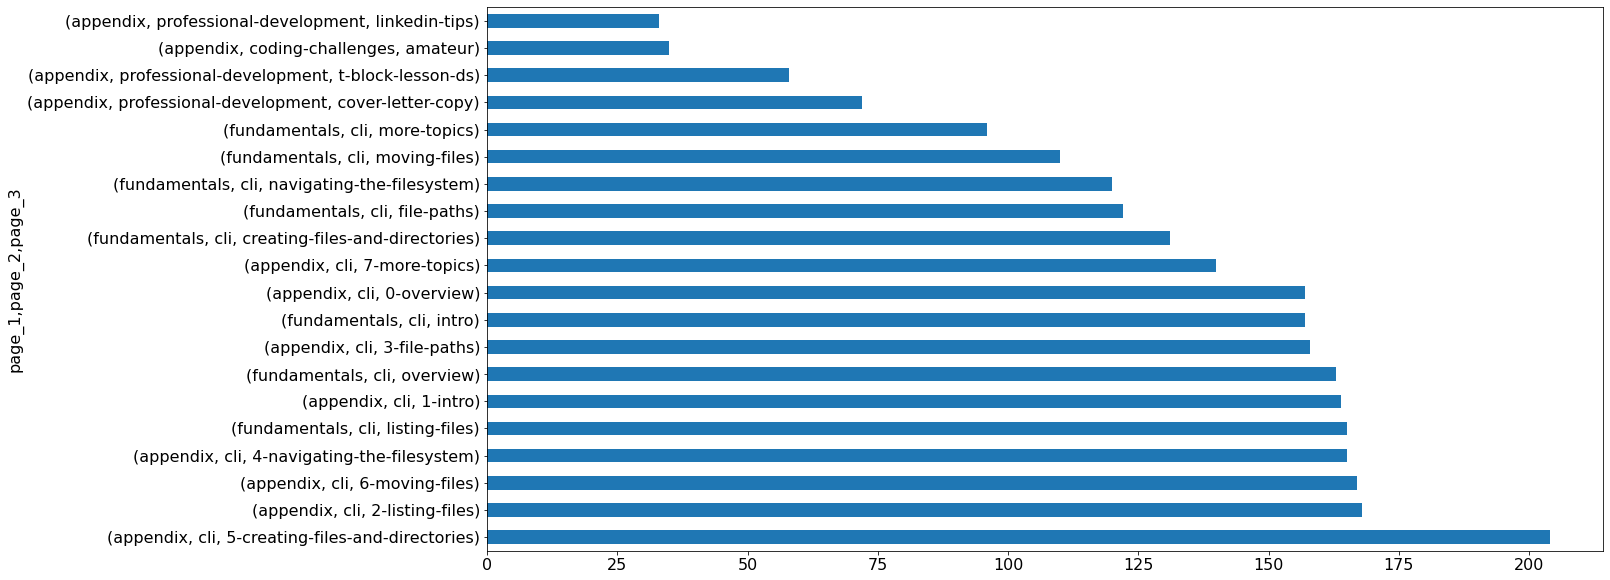

In [10]:
# visualize data science cohort pages/lessons visited

plt.figure(figsize=(20,10))
ds_df[['page_1','page_2','page_3']].value_counts().head(20).plot(kind='barh')
plt.show()

In [11]:
lg = wr.get_logs()
lg

,date,time,endpoint,user_id,ip,cohort_name,start_date,end_date,program_id
0,2018-01-26,09:55:03,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
1,2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2
...,...,...,...,...,...,...,...,...,...
847325,2021-04-21,16:41:51,jquery/personal-site,64,71.150.217.33,Staff,2014-02-04,2014-02-04,2
847326,2021-04-21,16:42:02,jquery/mapbox-api,64,71.150.217.33,Staff,2014-02-04,2014-02-04,2
847327,2021-04-21,16:42:09,jquery/ajax/weather-map,64,71.150.217.33,Staff,2014-02-04,2014-02-04,2
847328,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,24.160.137.86,Staff,2014-02-04,2014-02-04,2


In [12]:
lg.date = pd.to_datetime(lg.date)
# set date column to index
lg = lg.set_index(lg.date)

In [13]:
lg

,date,time,endpoint,user_id,ip,cohort_name,start_date,end_date,program_id
date,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26,2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2
...,...,...,...,...,...,...,...,...,...
2021-04-21,2021-04-21,16:41:51,jquery/personal-site,64,71.150.217.33,Staff,2014-02-04,2014-02-04,2
2021-04-21,2021-04-21,16:42:02,jquery/mapbox-api,64,71.150.217.33,Staff,2014-02-04,2014-02-04,2
2021-04-21,2021-04-21,16:42:09,jquery/ajax/weather-map,64,71.150.217.33,Staff,2014-02-04,2014-02-04,2
